# Project: Exploratory Data Analysis on Seattle Airbnb Data


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>



<a id='intro'></a>
## Introduction

AirBnB has grown in popularity as a go-to place for people to lease or rent short-term lodging. AirBnB has opened a whole new world for people trying to fill their spaces for a short period of time. It has helped host and renters to come close with each other.

In this project, we will be looking into the AirBnB listing associated with Seattle area. It will help us to discover few key aspects of the AirBnB renting scene in Seattle. We will be working with 3 dataset:

> 1. Listing: The listing dataset consists of all the necessary information of the host, place, review score, price of the place and many more. In general, it has all the information related to the posting made by the host and reviews given by the renter.

> 2. Calendar: It has all the information about availability of the place on each day with the price.

> 3. Reviews: It contains the details of the reviewer and the review they have placed about the rental place they stayed. 



### Research Questions:

Here, with all these dataset, we will be trying to answer 3 research question. They are:

`1. Does the price change with features like host being superhost, neighbourhood, property type and room type?`

`2. How does the price range varies throughout the year? Can we detect any seasonal pattern for pricing of the place?`

`3. How did people felt after their stay? `

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, you will load in the data, check for cleanliness, merging multiple files, printing some rows of the data in output, handling missing values, duplicat values, outliers etc. and then trim and clean your dataset for analysis.

Since, we are going to use specific columns for each of the dataset. So, in this portion of our project i.e Data Wrangling, we will make our dataset ready with all the necessary columns. We will be checking if they have any missing values or duplicate values or the outliers. 

In short, we will have all the necessary thing in one dataset to answer our research question in the uncoming part of our project i.e Exploratory Data Analysis.

### Importing all the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

from wordcloud import WordCloud, STOPWORDS 
from textblob import TextBlob
from nltk.corpus import stopwords
import string
import re
import langid

So, to answer our first research question i.e, **Does the price change with features like host being superhost, neighbourhood, property type and room type?** , we will be looking into the `listing` dataset.

In [2]:
listing = pd.read_csv('listings.csv')
listing

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,2.016010e+13,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,2.016010e+13,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,2.016010e+13,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,2.016010e+13,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,2.016010e+13,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950,2.016010e+13,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.30
3814,8902327,https://www.airbnb.com/rooms/8902327,2.016010e+13,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.00
3815,10267360,https://www.airbnb.com/rooms/10267360,2.016010e+13,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,2.016010e+13,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN


Here, we have 3818 rows and 92 columns. We do not need all of the columns for our analysis. So, we will be picking some necessary columns and answering our research question with them. Then we will be looking for any null values, NaN values in our dataset followed by looking for any duplicated values. If we find any we will either remove it or try to impute the values if possible. 

In [3]:
question_1 = listing[['host_is_superhost','neighbourhood_group_cleansed','property_type','room_type','price']]
question_1

,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,price
0,f,Queen Anne,Apartment,Entire home/apt,$85.00
1,t,Queen Anne,Apartment,Entire home/apt,$150.00
2,f,Queen Anne,House,Entire home/apt,$975.00
3,f,Queen Anne,Apartment,Entire home/apt,$100.00
4,f,Queen Anne,House,Entire home/apt,$450.00
...,...,...,...,...,...
3813,f,Other neighborhoods,House,Entire home/apt,$359.00
3814,f,Capitol Hill,Apartment,Entire home/apt,$79.00
3815,f,Rainier Valley,House,Entire home/apt,$93.00
3816,f,Capitol Hill,Condominium,Entire home/apt,$99.00


In [4]:
question_1.isna().sum()

host_is_superhost               2
neighbourhood_group_cleansed    0
property_type                   1
room_type                       0
price                           0
dtype: int64

In [5]:
question_1.isnull().sum()

host_is_superhost               2
neighbourhood_group_cleansed    0
property_type                   1
room_type                       0
price                           0
dtype: int64

Here, we have 3 null or NaN values so, for that we will be removing the values. As, we don't have any way of imputing the correct values. 

In [6]:
question_1 = question_1.dropna()
question_1

,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,price
0,f,Queen Anne,Apartment,Entire home/apt,$85.00
1,t,Queen Anne,Apartment,Entire home/apt,$150.00
2,f,Queen Anne,House,Entire home/apt,$975.00
3,f,Queen Anne,Apartment,Entire home/apt,$100.00
4,f,Queen Anne,House,Entire home/apt,$450.00
...,...,...,...,...,...
3813,f,Other neighborhoods,House,Entire home/apt,$359.00
3814,f,Capitol Hill,Apartment,Entire home/apt,$79.00
3815,f,Rainier Valley,House,Entire home/apt,$93.00
3816,f,Capitol Hill,Condominium,Entire home/apt,$99.00


We have dropped three rows and now our total rows is 3815. If we have any duplicated values. A host can list their house multiple time which can cause discrepancy in our data. So, we need to remove them for better analysis of our data.

In [7]:
question_1.duplicated().value_counts()

False    2268
True     1547
dtype: int64

We have 1547 duplicate values. So, we need to remove them all.

In [8]:
question_1.drop_duplicates(inplace=True)
question_1 = question_1.reset_index(drop=True)
question_1

,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,price
0,f,Queen Anne,Apartment,Entire home/apt,$85.00
1,t,Queen Anne,Apartment,Entire home/apt,$150.00
2,f,Queen Anne,House,Entire home/apt,$975.00
3,f,Queen Anne,Apartment,Entire home/apt,$100.00
4,f,Queen Anne,House,Entire home/apt,$450.00
...,...,...,...,...,...
2263,t,Other neighborhoods,Apartment,Entire home/apt,$125.00
2264,f,Other neighborhoods,House,Entire home/apt,$154.00
2265,f,Other neighborhoods,House,Entire home/apt,$359.00
2266,f,Rainier Valley,House,Entire home/apt,$93.00


After removing all of our NaN, null and duplicate values, we now have 2268 rows and 5 columns. Now, lets see the datatype of each columns. 

In [9]:
question_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268 entries, 0 to 2267
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   host_is_superhost             2268 non-null   object
 1   neighbourhood_group_cleansed  2268 non-null   object
 2   property_type                 2268 non-null   object
 3   room_type                     2268 non-null   object
 4   price                         2268 non-null   object
dtypes: object(5)
memory usage: 88.7+ KB


All the datatype are good for the analysis. However, we want the price to be either integer or float type to do some analysis on it. So, we need to change it's datatype. But first we need to remove the dollar sign and the comma sign and then only we will be able to change it datatype. For this, we are going to make a simple function. 

In [10]:
def dollar_remove(x):
    x = x.replace('$','')
    x = x.replace(',', '')
    x = float(x)
    return x

In [11]:
question_1['price'] = question_1['price'].map(lambda x: dollar_remove(x))
question_1

,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,price
0,f,Queen Anne,Apartment,Entire home/apt,85.0
1,t,Queen Anne,Apartment,Entire home/apt,150.0
2,f,Queen Anne,House,Entire home/apt,975.0
3,f,Queen Anne,Apartment,Entire home/apt,100.0
4,f,Queen Anne,House,Entire home/apt,450.0
...,...,...,...,...,...
2263,t,Other neighborhoods,Apartment,Entire home/apt,125.0
2264,f,Other neighborhoods,House,Entire home/apt,154.0
2265,f,Other neighborhoods,House,Entire home/apt,359.0
2266,f,Rainier Valley,House,Entire home/apt,93.0


In [12]:
question_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268 entries, 0 to 2267
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_is_superhost             2268 non-null   object 
 1   neighbourhood_group_cleansed  2268 non-null   object 
 2   property_type                 2268 non-null   object 
 3   room_type                     2268 non-null   object 
 4   price                         2268 non-null   float64
dtypes: float64(1), object(4)
memory usage: 88.7+ KB


Before moving forward, lets see how the price is distributed and if their is any outliers present in our dataset.

<AxesSubplot:xlabel='price', ylabel='Count'>

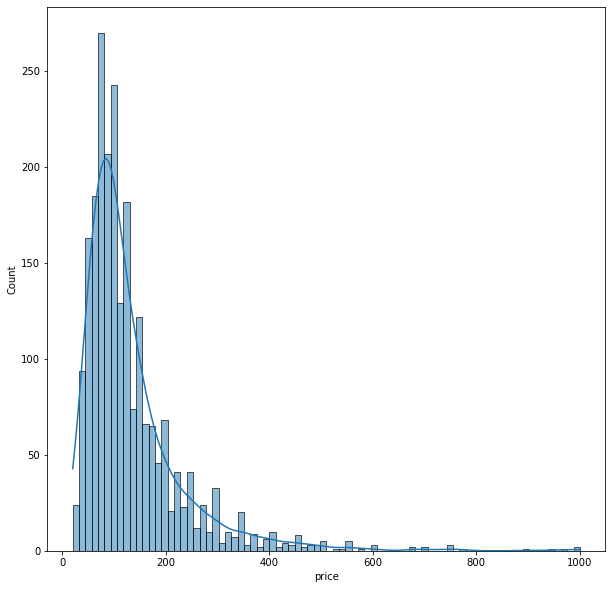

In [13]:
plt.figure(figsize=(10,10))
sns.histplot(data=question_1 ,x = question_1['price'],kde=True)

<AxesSubplot:xlabel='price'>

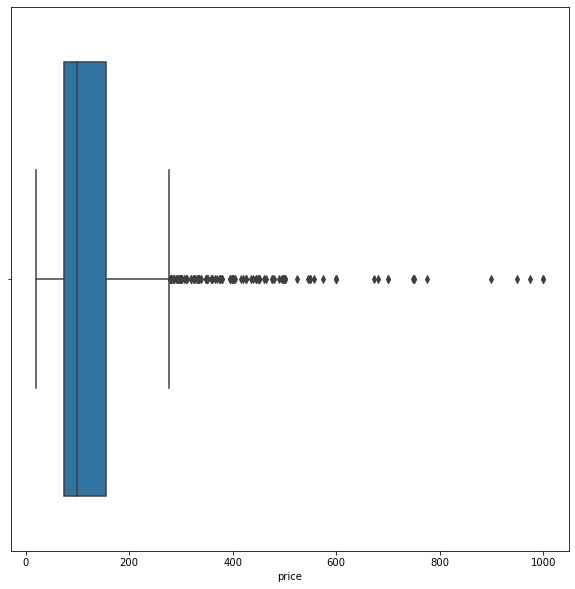

In [14]:
plt.figure(figsize=(10,10))
sns.boxplot(data=question_1 ,x = question_1['price'])

According to the histogram, we can see that, the price is highly left skeweed. This also means that we might have a lot of outliers. The outliers can be seen in the boxplot. But, the real question is are the outliers really outliers. If a property located in a good neighbourhood, if the host is a superhost with a lot of amenities and the renter is looking to rent the whole house then the price can go really high. Their might be some host who host people with high class cleaniness, amenities, comfort making the price hike. So, they might not be outliers but seems like outliers. We will see this in our analysis.

The dataset is read for answering the research question 1. 

Now moving on to our next research question, **How does the price range varies throughout the year? Can we detect any seasonal pattern for pricing of the place?** For this, we will be using the next dataset called `Calendar`.

In [15]:
calendar = pd.read_csv('calendar.csv')
calendar

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


Right form the start, we can see that, the price column has a lot of NaN values and it also has the dollar sign which probably makes it object datatype which is not ideal for any kind of numerical analysis. So, like above we need to remove the NaN values and change the price object type to numerical type. 

We can also notice that, the price is NaN where the availability is false (f). So, we can conclude that, when the place is not available the price is not available. So, with that logic we will be making a new dataframe where the places which are available are placed. 

In [16]:
calendar.isna().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [17]:
calendar['available'].value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [18]:
question_2 = calendar[calendar['available']=='t']
question_2

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
9,241032,2016-01-13,t,$85.00
10,241032,2016-01-14,t,$85.00
14,241032,2016-01-18,t,$85.00
...,...,...,...,...
1393207,10208623,2016-01-06,t,$87.00
1393208,10208623,2016-01-07,t,$87.00
1393211,10208623,2016-01-10,t,$87.00
1393212,10208623,2016-01-11,t,$87.00


In [19]:
question_2.isna().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

In [20]:
question_2.duplicated().value_counts()

False    934542
dtype: int64

We have a clean dataset, with no NaN values and duplicate values. Now lets change the price datatype to float. We will be using above function for this. Here, we also have to change the date datatype which is in object to datatime for our analysis.

In [21]:
question_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  934542 non-null  int64 
 1   date        934542 non-null  object
 2   available   934542 non-null  object
 3   price       934542 non-null  object
dtypes: int64(1), object(3)
memory usage: 35.6+ MB


In [22]:
question_2['price'] = question_2['price'].map(lambda x: dollar_remove(x))
question_2

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0
...,...,...,...,...
1393207,10208623,2016-01-06,t,87.0
1393208,10208623,2016-01-07,t,87.0
1393211,10208623,2016-01-10,t,87.0
1393212,10208623,2016-01-11,t,87.0


In [23]:
question_2['date'] = pd.to_datetime(question_2['date'])

In [24]:
question_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  934542 non-null  int64         
 1   date        934542 non-null  datetime64[ns]
 2   available   934542 non-null  object        
 3   price       934542 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 35.6+ MB


Until here, we have successfull handled the null values, the duplicated values, changed the datatype. Now, lets do some feature engineering and add individual year, month and day which will help us to answer our research question.

In [25]:
question_2['year'] = question_2['date'].dt.year

In [26]:
question_2['month'] = question_2['date'].dt.month

In [27]:
question_2['day'] = question_2['date'].dt.day

In [28]:
question_2

,listing_id,date,available,price,year,month,day
0,241032,2016-01-04,t,85.0,2016,1,4
1,241032,2016-01-05,t,85.0,2016,1,5
9,241032,2016-01-13,t,85.0,2016,1,13
10,241032,2016-01-14,t,85.0,2016,1,14
14,241032,2016-01-18,t,85.0,2016,1,18
...,...,...,...,...,...,...,...
1393207,10208623,2016-01-06,t,87.0,2016,1,6
1393208,10208623,2016-01-07,t,87.0,2016,1,7
1393211,10208623,2016-01-10,t,87.0,2016,1,10
1393212,10208623,2016-01-11,t,87.0,2016,1,11


Now, we will be keeping the columns which we need for our analysis. So, we will be dropping, available, listing_id and we will be resetting the index too. 

In [29]:
question_2 = question_2.drop(['listing_id','available'],axis=1).reset_index(drop=True)
question_2

,date,price,year,month,day
0,2016-01-04,85.0,2016,1,4
1,2016-01-05,85.0,2016,1,5
2,2016-01-13,85.0,2016,1,13
3,2016-01-14,85.0,2016,1,14
4,2016-01-18,85.0,2016,1,18
...,...,...,...,...,...
934537,2016-01-06,87.0,2016,1,6
934538,2016-01-07,87.0,2016,1,7
934539,2016-01-10,87.0,2016,1,10
934540,2016-01-11,87.0,2016,1,11


The dataset for research question 2 is ready. 

Now, lets move to another question i.e., **How did people felt after their stay?** Here, we will be looking into the reviews dataset and seeing what people liked about their stay and what they did not like. We will be doing sentiment analysis and showing the result both positive and negative comments in a word cloud. 

In [30]:
reviews = pd.read_csv('reviews.csv')
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
...,...,...,...,...,...,...
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...
84846,3624990,51511988,2015-10-20,19543701,Jaime,"Gran ubicación, cerca de todo lo atractivo del..."
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si..."


Here, we will be focused on the comments other all the columns are irrelevant for our analysis. 

First we need to remove all the null rows from the comments, after that we need to identify if the language used is in english or not. We will be focused on English comments for our analysis. After that, we will remove all the punctuation, numbers, stopwords, we will change all the contractions to it normal form and we will also lower case all the comments. This all is done to prep our data for our sentiment analysis.

In [31]:
reviews.isna().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

In [32]:
reviews = reviews.dropna()
reviews.isna().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

Here, we have removed all the null values. Now, we will filter our all the non-English comments. For this we will be using a library called `langid`. 

In [33]:
reviews['English_or_Not'] = reviews['comments'].apply(lambda x: langid.classify(x)[0])
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,English_or_Not
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,en
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,en
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",en
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,en
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,en


In [34]:
non_eng = reviews[reviews['English_or_Not']!='en']
print('There are {} non English comments.'.format(non_eng.shape[0]))
non_eng['comments'].tail(10)

There are 1115 non English comments.


83944    Petite perle à Seattle! Ce logement nous a séd...
83953    Barbara und Michael empfingen uns mit offenen ...
84066    A relaxing, nice place. Accurate description. ...
84071    Margot è sempre stata gentile e disponibile. L...
84117    숙소가 깔끔하고 아늑했다. 주변이 조용해 휴식을 취하기에 가장 적절한 장소였다. 집...
84121    Fue agradable, los anfitriones preparan tu est...
84338    非常舒适安静的房子，床边有窗户，晚上睡觉可以看见星星月亮，房东非常热情，退房的时候我去机场，...
84378    Die Unterkunft war sehr schön und genau so, wi...
84405                                Was definitely great 
84846    Gran ubicación, cerca de todo lo atractivo del...
Name: comments, dtype: object

Here, we can see, we have 1115 non english comments and 83716 english comments. So, we need to remove these and only take the english comments. Now, going forward we will remove all the unnecessary columns and only keep the comments column. 

In [35]:
reviews = reviews[reviews['English_or_Not']=='en']
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments,English_or_Not
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,en
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,en
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",en
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,en
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,en
...,...,...,...,...,...,...,...
84843,3624990,49768901,2015-10-06,37578535,Michael,Comfortability upon arrival and everything wit...,en
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...,en
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...,en
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si...",en


In [36]:
reviews = reviews[['comments']].reset_index(drop=True)
reviews

,comments
0,Cute and cozy place. Perfect location to every...
1,Kelly has a great room in a very central locat...
2,"Very spacious apartment, and in a great neighb..."
3,Close to Seattle Center and all it has to offe...
4,Kelly was a great host and very accommodating ...
...,...
83711,Comfortability upon arrival and everything wit...
83712,The description and pictures of the apartment ...
83713,We had an excellent stay. It was clean and com...
83714,"Very good apartement, clean and well sized. Si..."


In [37]:
## lower case

reviews['comments']  = reviews['comments'].apply(lambda x: ' '.join(x.lower() for x in x.split()))

In [38]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he shall have ",
"he's": "e is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that has",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [39]:
contractions_re=re.compile('(%s)' % '|'.join(contractions.keys()))
def expand_contractions(text,contractions=contractions):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)

reviews['comments']=reviews['comments'].apply(lambda x:expand_contractions(x))

In [40]:
# removing punctuation

print(string.punctuation)

def remove_punc(txt):
    txt_nopunct = "".join([x for x in txt if x not in string.punctuation])
    return txt_nopunct

reviews['comments'] = reviews['comments'].apply(lambda x: remove_punc(x))

reviews.head()

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


,comments
0,cute and cozy place perfect location to everyt...
1,kelly has a great room in a very central locat...
2,very spacious apartment and in a great neighbo...
3,close to seattle center and all it has to offe...
4,kelly was a great host and very accommodating ...


In [41]:
#removing numbers
numbers = ['0', '1', '2', '3', '4', '5','6', '7', '8', '9']

reviews['comments'] = reviews['comments'].apply(lambda x: ' '.join(x for x in x.split() if x not in numbers))

In [42]:
#removing stopwords

sr = stopwords.words('english')

reviews['comments'] = reviews['comments'].apply(lambda x: ' '.join(x for x in x.split() if x not in sr))
reviews.head()

,comments
0,cute cozy place perfect location everything
1,kelly great room central location beautiful bu...
2,spacious apartment great neighborhood kind apa...
3,close seattle center offer ballet theater muse...
4,kelly great host accommodating great neighborh...


Until here, we have preprocessed our dataset to find the polarity/sentiment of the sentence. Now, we will apply TextBlob and find the polarity.

In [43]:
sentiment=[]
sentiment_score = []
keywords = []

for x in reviews['comments'] :
    senti=TextBlob(x) ## sentiment analysis using TextBlob
    
    Token= [t for t in x.split()] ## string the tokens/keywords
    keywords.append(Token)

    ## conditions for division of sentiment
    if senti.sentiment.polarity > 0 and senti.sentiment.polarity <= 1 :
        sentiment_score.append(senti.sentiment.polarity)
        sentiment.append("Positive")
    else:
        sentiment_score.append(senti.sentiment.polarity)
        sentiment.append("Negative")
    
## storing the new data in our dataset
reviews['Keywords']= keywords
reviews['Sentiment']= sentiment
reviews['Sentiment_Score'] = sentiment_score

In [44]:
reviews

,comments,Keywords,Sentiment,Sentiment_Score
0,cute cozy place perfect location everything,"[cute, cozy, place, perfect, location, everyth...",Positive,0.433333
1,kelly great room central location beautiful bu...,"[kelly, great, room, central, location, beauti...",Positive,0.281250
2,spacious apartment great neighborhood kind apa...,"[spacious, apartment, great, neighborhood, kin...",Positive,0.488889
3,close seattle center offer ballet theater muse...,"[close, seattle, center, offer, ballet, theate...",Positive,0.358333
4,kelly great host accommodating great neighborh...,"[kelly, great, host, accommodating, great, nei...",Positive,0.514815
...,...,...,...,...
83711,comfortability upon arrival everything within ...,"[comfortability, upon, arrival, everything, wi...",Positive,0.416667
83712,description pictures apartment exactly receive...,"[description, pictures, apartment, exactly, re...",Positive,0.164286
83713,excellent stay clean comfortable convenient co...,"[excellent, stay, clean, comfortable, convenie...",Positive,0.333333
83714,good apartement clean well sized situated next...,"[good, apartement, clean, well, sized, situate...",Positive,0.155208


In [45]:
reviews['Sentiment'].value_counts()

Positive    82157
Negative     1559
Name: Sentiment, dtype: int64

We can see that, we have both positive and negative comments by the guest/renter. Now, we will divide the dataset according to the sentiment we got inorder to analyze them seperately in a word cloud.

In [46]:
question_3_positive = reviews[reviews['Sentiment'] == 'Positive']
question_3_positive = question_3_positive.reset_index(drop=True)
question_3_positive

,comments,Keywords,Sentiment,Sentiment_Score
0,cute cozy place perfect location everything,"[cute, cozy, place, perfect, location, everyth...",Positive,0.433333
1,kelly great room central location beautiful bu...,"[kelly, great, room, central, location, beauti...",Positive,0.281250
2,spacious apartment great neighborhood kind apa...,"[spacious, apartment, great, neighborhood, kin...",Positive,0.488889
3,close seattle center offer ballet theater muse...,"[close, seattle, center, offer, ballet, theate...",Positive,0.358333
4,kelly great host accommodating great neighborh...,"[kelly, great, host, accommodating, great, nei...",Positive,0.514815
...,...,...,...,...
82152,comfortability upon arrival everything within ...,"[comfortability, upon, arrival, everything, wi...",Positive,0.416667
82153,description pictures apartment exactly receive...,"[description, pictures, apartment, exactly, re...",Positive,0.164286
82154,excellent stay clean comfortable convenient co...,"[excellent, stay, clean, comfortable, convenie...",Positive,0.333333
82155,good apartement clean well sized situated next...,"[good, apartement, clean, well, sized, situate...",Positive,0.155208


In [47]:
question_3_negative = reviews[reviews['Sentiment'] == 'Negative']
question_3_negative.reset_index(drop=True, inplace=True)
question_3_negative

,comments,Keywords,Sentiment,Sentiment_Score
0,host canceled reservation 21 days arrival auto...,"[host, canceled, reservation, 21, days, arriva...",Negative,0.000000
1,host made feel home welcomed open personality,"[host, made, feel, home, welcomed, open, perso...",Negative,0.000000
2,cozy private space close beach shopping main s...,"[cozy, private, space, close, beach, shopping,...",Negative,-0.144271
3,jessica accommodating let us leave luggage pla...,"[jessica, accommodating, let, us, leave, lugga...",Negative,0.000000
4,blue room rocks,"[blue, room, rocks]",Negative,0.000000
...,...,...,...,...
1554,reservation canceled days arrival automated po...,"[reservation, canceled, days, arrival, automat...",Negative,0.000000
1555,following last review however things would giv...,"[following, last, review, however, things, wou...",Negative,-0.034074
1556,host canceled reservation days arrival automat...,"[host, canceled, reservation, days, arrival, a...",Negative,0.000000
1557,location location location close freemont priv...,"[location, location, location, close, freemont...",Negative,-0.066667


With this the data wrangling part of our project is completed, we have prepared our datasets for further analysis.

<a id='eda'></a>
## Exploratory Data Analysis

> In this section, we will be answering all the research question by computing statistical analysis, create visualization, look for multiple trends, compare them, and include single variable and multiple-variable exploration.

### 1.Does the price change with features like host being superhost, neighbourhood, property type and room type?

Here, we will be seeing how price value change if the host is superhost or where the neighbourhood is located or with the property type and room type. 

In [48]:
question_1

,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,price
0,f,Queen Anne,Apartment,Entire home/apt,85.0
1,t,Queen Anne,Apartment,Entire home/apt,150.0
2,f,Queen Anne,House,Entire home/apt,975.0
3,f,Queen Anne,Apartment,Entire home/apt,100.0
4,f,Queen Anne,House,Entire home/apt,450.0
...,...,...,...,...,...
2263,t,Other neighborhoods,Apartment,Entire home/apt,125.0
2264,f,Other neighborhoods,House,Entire home/apt,154.0
2265,f,Other neighborhoods,House,Entire home/apt,359.0
2266,f,Rainier Valley,House,Entire home/apt,93.0


#### Superhost vs Price

In [49]:
superhost = question_1.groupby('host_is_superhost')['price'].mean().sort_values(ascending=False).reset_index()
superhost

,host_is_superhost,price
0,t,134.090290
1,f,133.575848


Text(0.5, 1.0, 'Superhost vs. Price')

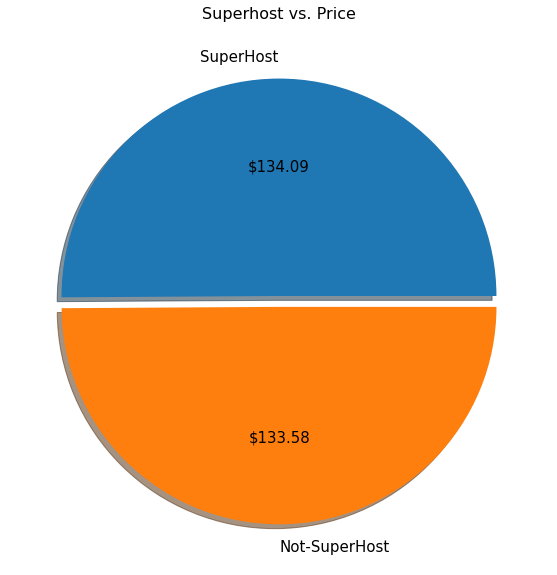

In [51]:
plt.figure(figsize=(10,10))

values = superhost['price']
ax = plt.pie(superhost['price'], labels = ['SuperHost','Not-SuperHost'], autopct = lambda x: '${:.2f}'.format(x*values.sum()/100), shadow=True, explode = (0,0.05), textprops={'fontsize': 15})
plt.title('Superhost vs. Price', fontsize=16)

Here, we can see that, the price does not varies with the host being superhost or not. On average, the superhost charges only, $0.5 more than non-superhost which is negligible. However, getting that superhost title makes them more credible and they can reach to many customers as possible. They rental place will not go unrented for a long time making them more money. This might also be done to compete with other non-superhost rental place.

#### Neighbourhood vs. Price

Here we will be seeing top 5 expensive and cheapest neighbourhood to leave in Seattle area while visiting. 

In [52]:
neighbourhood = question_1.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending=False).reset_index()
neighbourhood

,neighbourhood_group_cleansed,price
0,Magnolia,175.074074
1,Downtown,167.870833
2,Queen Anne,163.763819
3,Capitol Hill,148.160959
4,Cascade,147.338028
5,West Seattle,138.472222
6,Central Area,130.391489
7,Other neighborhoods,130.346154
8,Ballard,126.715190
9,Interbay,109.727273


#### Top 5 Expensive Neighbourhood to stay at Seattle

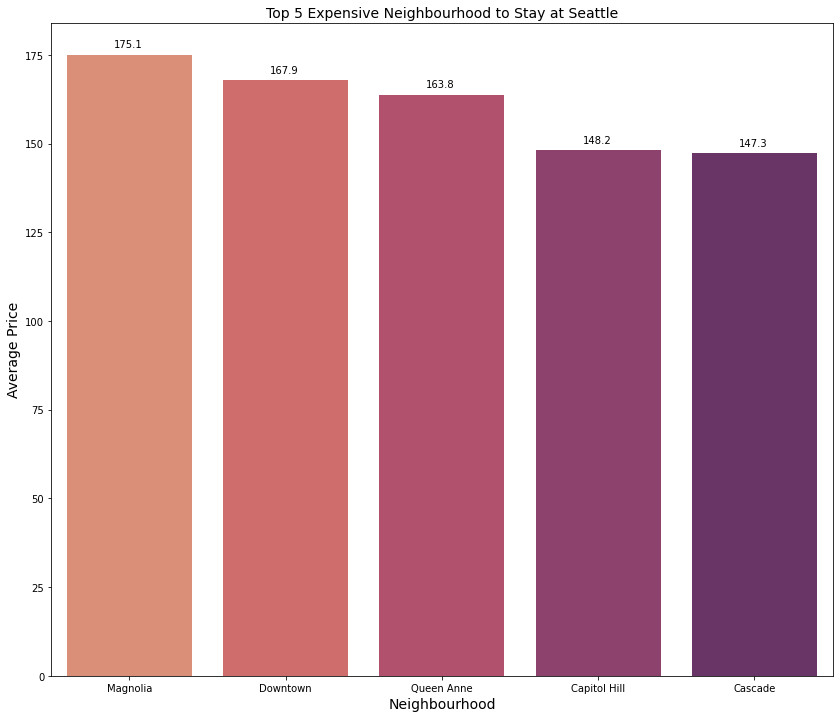

In [53]:
top_5 = neighbourhood.head()

plt.figure(figsize=(14,12))

ax = sns.barplot(data=top_5, x='neighbourhood_group_cleansed',y='price',palette = 'flare')

plt.title('Top 5 Expensive Neighbourhood to Stay at Seattle', fontsize=14)
plt.xlabel('Neighbourhood', fontsize=14)
plt.ylabel('Average Price',fontsize=14)

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+.3, p.get_height()+2))

#### Top 5 Cheapest Neighbourhood to stay at Seattle while Visiting

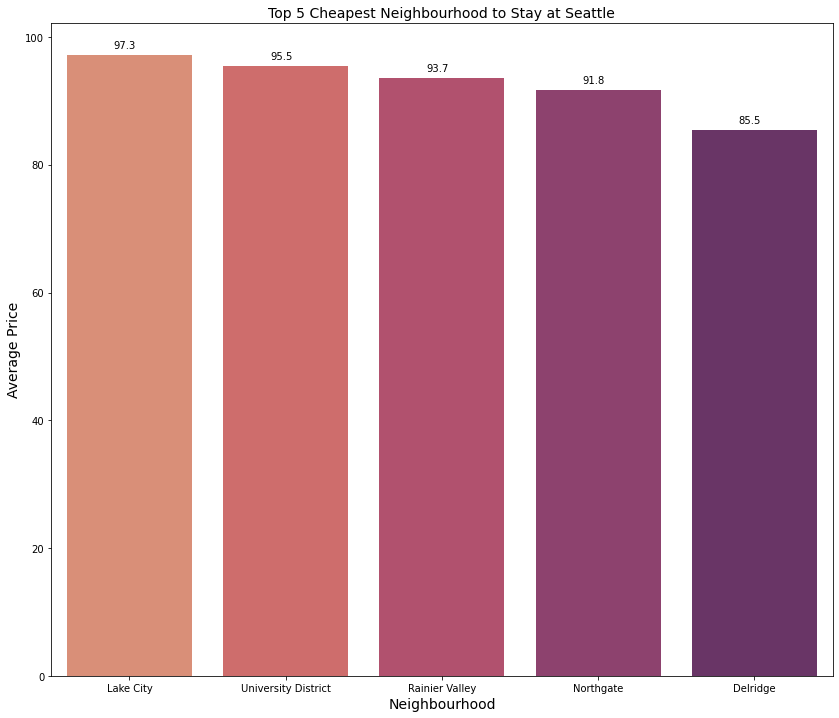

In [54]:
bottom_5 = neighbourhood.tail()

plt.figure(figsize=(14,12))

ax = sns.barplot(data=bottom_5, x='neighbourhood_group_cleansed',y='price',palette = 'flare')

plt.title('Top 5 Cheapest Neighbourhood to Stay at Seattle', fontsize=14)
plt.xlabel('Neighbourhood', fontsize=14)
plt.ylabel('Average Price',fontsize=14)

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+.3, p.get_height()+1))

We can see that, the most expensive neighbourhood which is Magnolia costing about $175 that is twice as expensive as the most cheapest place which is Delridge costing about 85.5. From this we can say that, the neighbourhood has high impact on the price. The expensive neighbourhood might be in the center of the city or near the sea/lake where one has a lot to experience and explore whereas the cheap/affordable neighbourhood might not have those kind of comfort and experiences which expensive neighbourhood provides.

In [55]:
property_type = question_1.groupby('property_type')['price'].mean().sort_values(ascending=False).reset_index()
property_type

,property_type,price
0,Boat,282.375000
1,Condominium,148.512500
2,House,140.485714
3,Loft,136.897436
4,Townhouse,135.466019
5,Apartment,126.085616
6,Camper/RV,124.250000
7,Bungalow,115.615385
8,Bed & Breakfast,112.171429
9,Cabin,104.666667


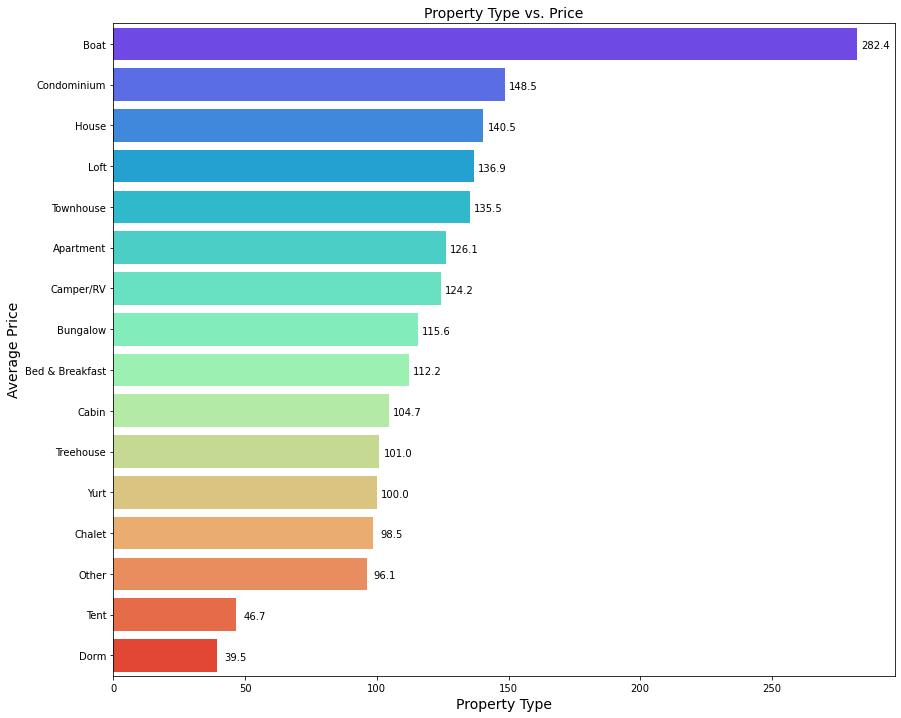

In [56]:
plt.figure(figsize=(14,12))

ax = sns.barplot(data=property_type, x='price',y='property_type',palette = 'rainbow')

plt.title('Property Type vs. Price', fontsize=14)
plt.xlabel('Property Type', fontsize=14)
plt.ylabel('Average Price',fontsize=14)

for p in ax.patches:
    width = p.get_width()
    plt.text(7+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.1f}'.format(width),
             ha='center', va='center')

Here, we can see that, the boat is the most expensive property type to rent in Seattle and by a large margin. The boat is about $140 more expensive than the second most expensive property type i.e, Condominium. Tent and Dorm are the least expensive property type we have in the seattle area which cost in the range of 40-50 dollars. 

In [57]:
room_type = question_1.groupby('room_type')['price'].mean().sort_values(ascending=False).reset_index()
room_type

,room_type,price
0,Entire home/apt,166.661806
1,Private room,78.872848
2,Shared room,50.821918


Text(0.5, 1.0, 'Room Type vs. Price')

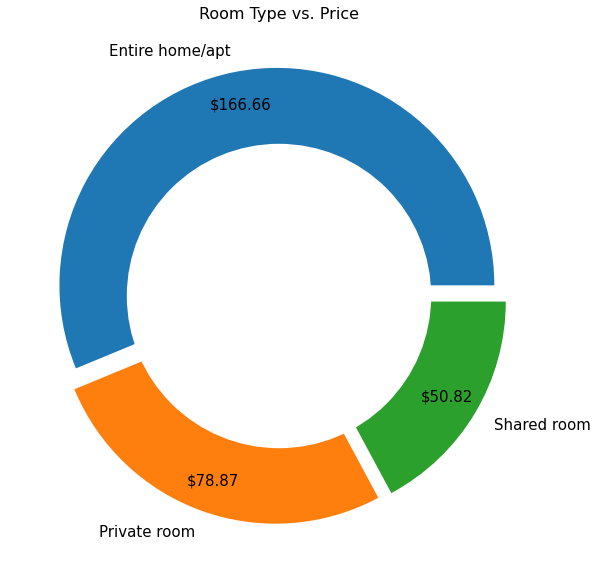

In [58]:
plt.figure(figsize=(10,10))
explode = (0.05, 0.05, 0.05)
values = room_type['price']
plt.pie(room_type['price'], labels=room_type['room_type'],autopct=lambda x: '${:.2f}'.format(x*values.sum()/100), pctdistance=0.85, explode=explode, textprops={'fontsize': 15})

# drawing circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# adding circle in the pie
fig.gca().add_artist(centre_circle)
plt.title('Room Type vs. Price', fontsize=16)

The result we got from Room Type vs. Price should not be so suprising. Renting a entire house or apartment is most costly than renting a private room or a shared room.

### 2. How does the price range varies throughout the year? Can we detect any seasonal pattern for pricing of the place?

Here, we will be answering how does the price range varies in the Seattle are throughout the year. Is there any seasonal pattern for pricing of the place. Lets, get into the analysis.

In [59]:
question_2

,date,price,year,month,day
0,2016-01-04,85.0,2016,1,4
1,2016-01-05,85.0,2016,1,5
2,2016-01-13,85.0,2016,1,13
3,2016-01-14,85.0,2016,1,14
4,2016-01-18,85.0,2016,1,18
...,...,...,...,...,...
934537,2016-01-06,87.0,2016,1,6
934538,2016-01-07,87.0,2016,1,7
934539,2016-01-10,87.0,2016,1,10
934540,2016-01-11,87.0,2016,1,11


In [60]:
price_date = question_2.groupby('date')['price'].mean().reset_index()

price_date

,date,price
0,2016-01-04,122.085879
1,2016-01-05,120.681307
2,2016-01-06,120.928258
3,2016-01-07,120.958896
4,2016-01-08,127.640853
...,...,...
360,2016-12-29,138.045503
361,2016-12-30,144.738380
362,2016-12-31,145.698146
363,2017-01-01,138.126968


(array([115., 120., 125., 130., 135., 140., 145., 150., 155., 160.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

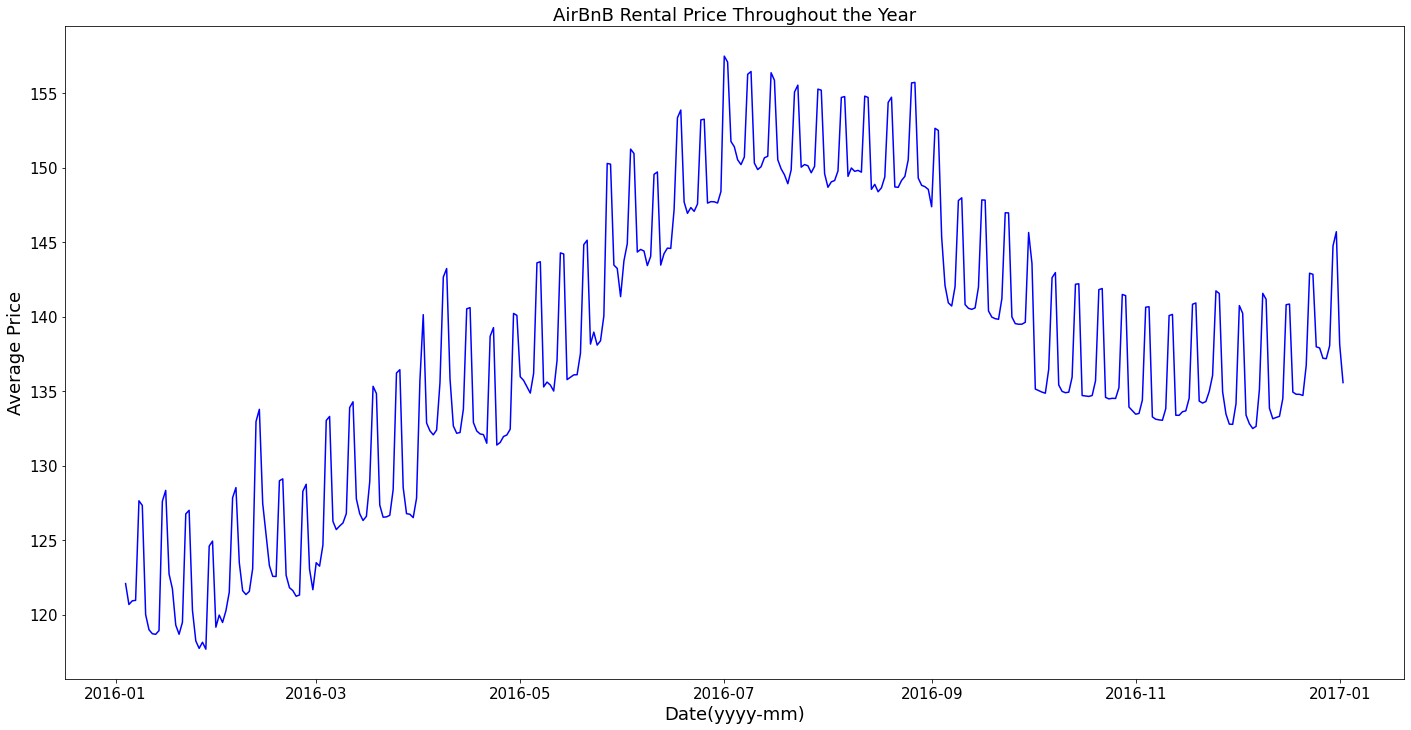

In [61]:
plt.figure(figsize=(24, 12))
plt.plot(price_date['date'], price_date['price'], color='b')

plt.title('AirBnB Rental Price Throughout the Year', fontsize=18)
plt.ylabel('Average Price', fontsize=18)
plt.xlabel('Date(yyyy-mm)',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

Here, we can see that, their is some kind of trend going on but it cannot be seen clearly. So, we are going group the price with respect with months.

In [62]:
months = pd.pivot_table(data=question_2[question_2['year'] == 2016],index='month',values='price',aggfunc='mean').reset_index()
months

,month,price
0,1,121.568409
1,2,124.293927
2,3,128.644488
3,4,135.097005
4,5,139.538183
5,6,147.473137
6,7,152.094150
7,8,150.656594
8,9,143.255949
9,10,137.031939


(array([120., 125., 130., 135., 140., 145., 150., 155.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

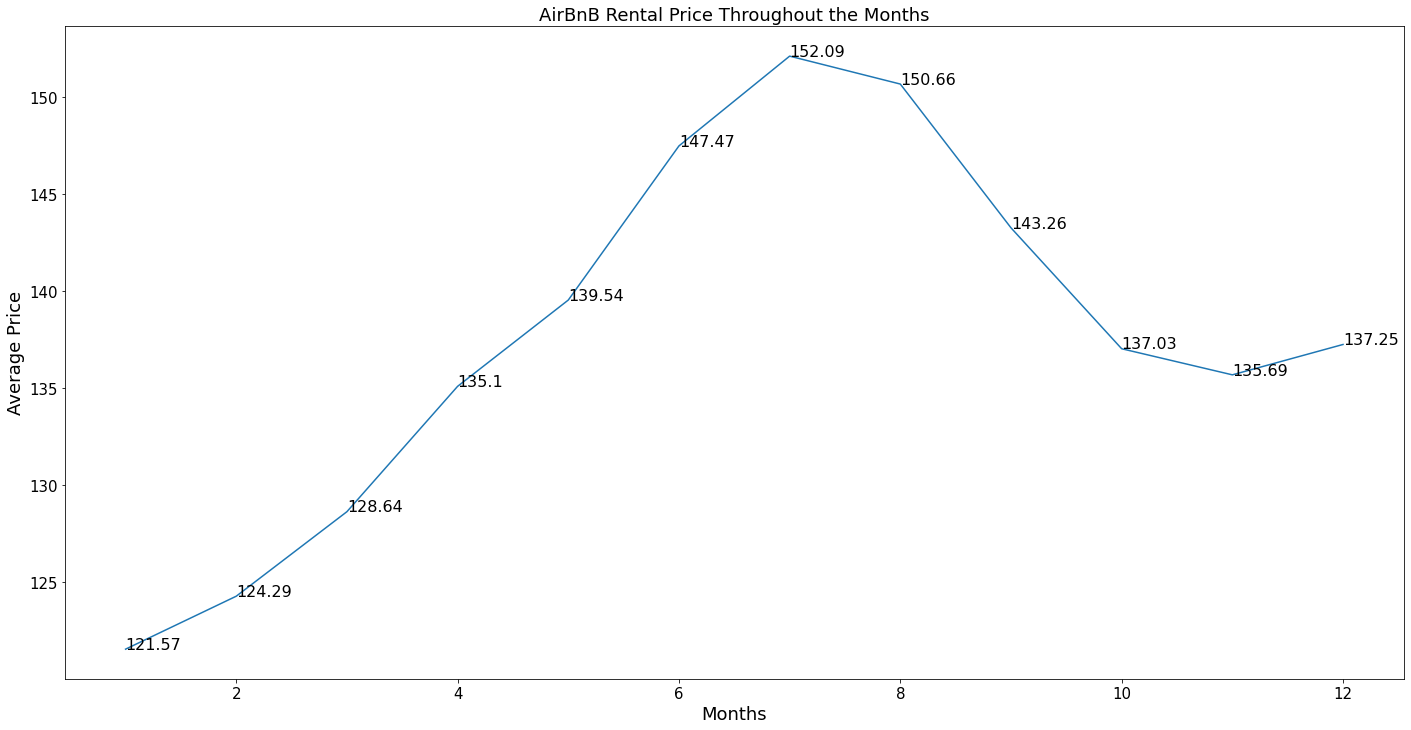

In [63]:
fig, ax = plt.subplots(figsize=(24, 12))
sns.lineplot(data=months, x=months['month'],y=months['price'])

for index in range(len(months['month'])):
  ax.text(months['month'][index], months['price'][index], round(months['price'][index],2), size=16)

plt.title('AirBnB Rental Price Throughout the Months', fontsize=18)
plt.ylabel('Average Price', fontsize=18)
plt.xlabel('Months',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

According to the above analysis, we can see that, the starting months i.e January, February are the most cheapest time to book/visit Seattle as the average price's for booking a place is as low as $120. The price gradually rises up until the month of July. The most expensive months to book a place in Seattle is on the month of July and August. After the month of July, the price slowly drop down until December which has a little bump in price.

This can be looked in a seasonal way also. In the month of January, February, March, the weather is cold and less people travel. So, the price is less. However, as we go to the summer day i.e in the month of June, July, August. People travel a lot as compared to winter season. The weather is perfect in these month and a lot of people have summer breaks which causes price to go up. After these days, as the summer season goes the number of people travelling also goes down, the cost of the rental property goes down because the demand for rental place is less. However, their is a small bump up in the month of December. This might be caused by Christmas or New Year, as many people go to different places to celebrate this day in new places. In this way, we can say the seasonal pattern has some affect on price.

### 3. How did people felt after their stay?

In [64]:
question_3_positive

,comments,Keywords,Sentiment,Sentiment_Score
0,cute cozy place perfect location everything,"[cute, cozy, place, perfect, location, everyth...",Positive,0.433333
1,kelly great room central location beautiful bu...,"[kelly, great, room, central, location, beauti...",Positive,0.281250
2,spacious apartment great neighborhood kind apa...,"[spacious, apartment, great, neighborhood, kin...",Positive,0.488889
3,close seattle center offer ballet theater muse...,"[close, seattle, center, offer, ballet, theate...",Positive,0.358333
4,kelly great host accommodating great neighborh...,"[kelly, great, host, accommodating, great, nei...",Positive,0.514815
...,...,...,...,...
82152,comfortability upon arrival everything within ...,"[comfortability, upon, arrival, everything, wi...",Positive,0.416667
82153,description pictures apartment exactly receive...,"[description, pictures, apartment, exactly, re...",Positive,0.164286
82154,excellent stay clean comfortable convenient co...,"[excellent, stay, clean, comfortable, convenie...",Positive,0.333333
82155,good apartement clean well sized situated next...,"[good, apartement, clean, well, sized, situate...",Positive,0.155208


In [65]:
comments = ''.join(list(question_3_positive['comments'].values))
comments = comments.replace('\r', ' ')
comments = comments.replace('\n', ' ')
comments = comments.replace('Seattle', ' ')
comments = comments.replace('seattle', ' ')
comments[:5000]

'cute cozy place perfect location everythingkelly great room central location beautiful building architecture style really like felt guite home wish spent time went walk found   center major food festival progress treat visited space needle chihuly glass exhibit pikes place market wow thanks great stayspacious apartment great neighborhood kind apartment wish really get meet kelly always readily available phone believe issue want call finding place park sincerely doubt easy park anywhere residential area pm fridayclose   center offer ballet theater museum space needle restaurants ilk blocks away metropolitan probably coolest grocer ever find easy find kelly warm welcoming really interesting talkkelly great host accommodating great neighborhood great coffee around much stay time spent interacting pleasant apartment great location close   center neighborhood lot good food wellkelly great place great looking clean simple well kept place min walk   bike share aug 2015 used weekkelly great n

### Positive Comments:

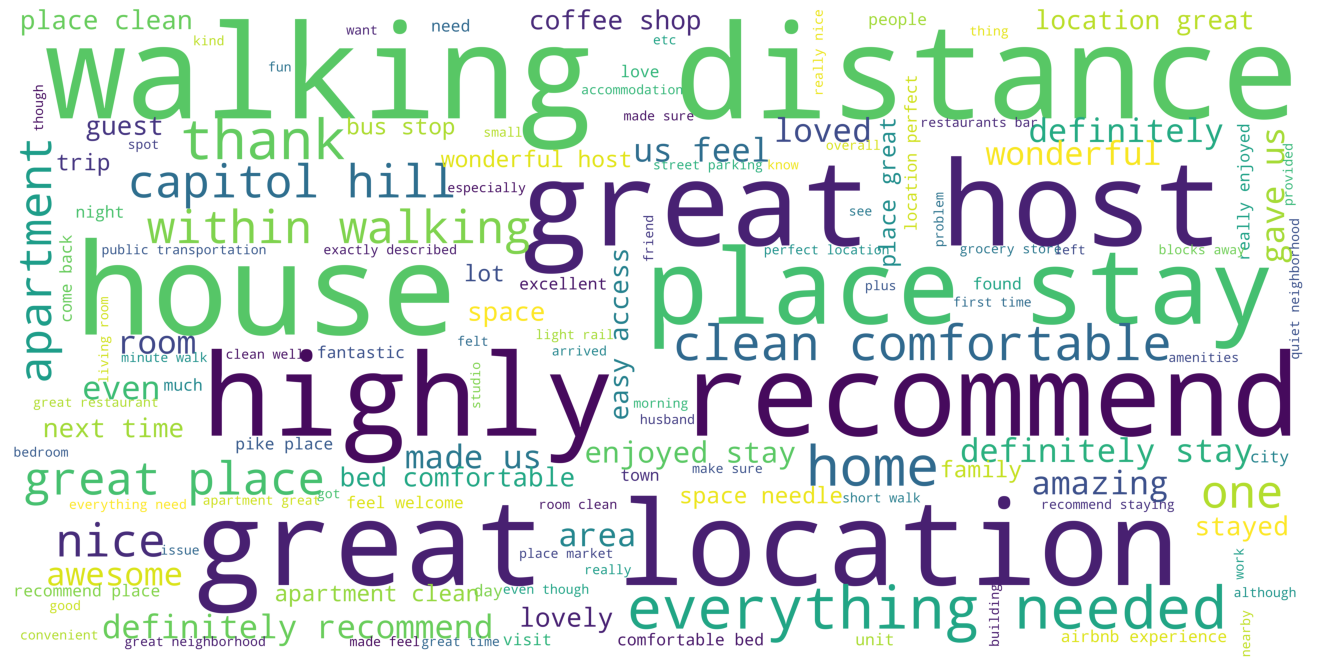

In [66]:
plt.figure(figsize=(24, 12))
wordcloud =  WordCloud(background_color='white', max_words=1000, max_font_size=100, stopwords=STOPWORDS, scale=32, random_state=42)
wordcloud.generate_from_text(comments)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Negative Comments:

In [67]:
comments = ''.join(list(question_3_negative['comments'].values))
comments = comments.replace('\r', ' ')
comments = comments.replace('\n', ' ')
comments = comments.replace('Seattle', ' ')
comments = comments.replace('seattle', ' ')
comments[:5000]

'host canceled reservation 21 days arrival automated postinghost made feel home welcomed open personalitycozy private space close beach shopping main street restaurants thing little uncomfortable weather cold bathroomshower outside room one go patio main housejessica accommodating let us leave luggage place checkin even left us handwritten card welcoming usblue room rockscomfycleanquietvery nicethankyuhost canceled reservation day arrival automated postingreservation canceled 132 days arrival automated postingreservation canceled 37 days arrival automated postinghost canceled reservation days arrival automated postingsmall cozy easy downtownreservation canceled 12 days arrival automated postingshortgreat stay corey amandas place wish could longer would definitely recommendspace looks seen pictures artsy eclectic cory amanda extremely welcoming accommodatingunit akin longterm corporate housing condo unit clean neat pedestrian kitchen pots pans dishes utensils lacks cooking oil spices sa

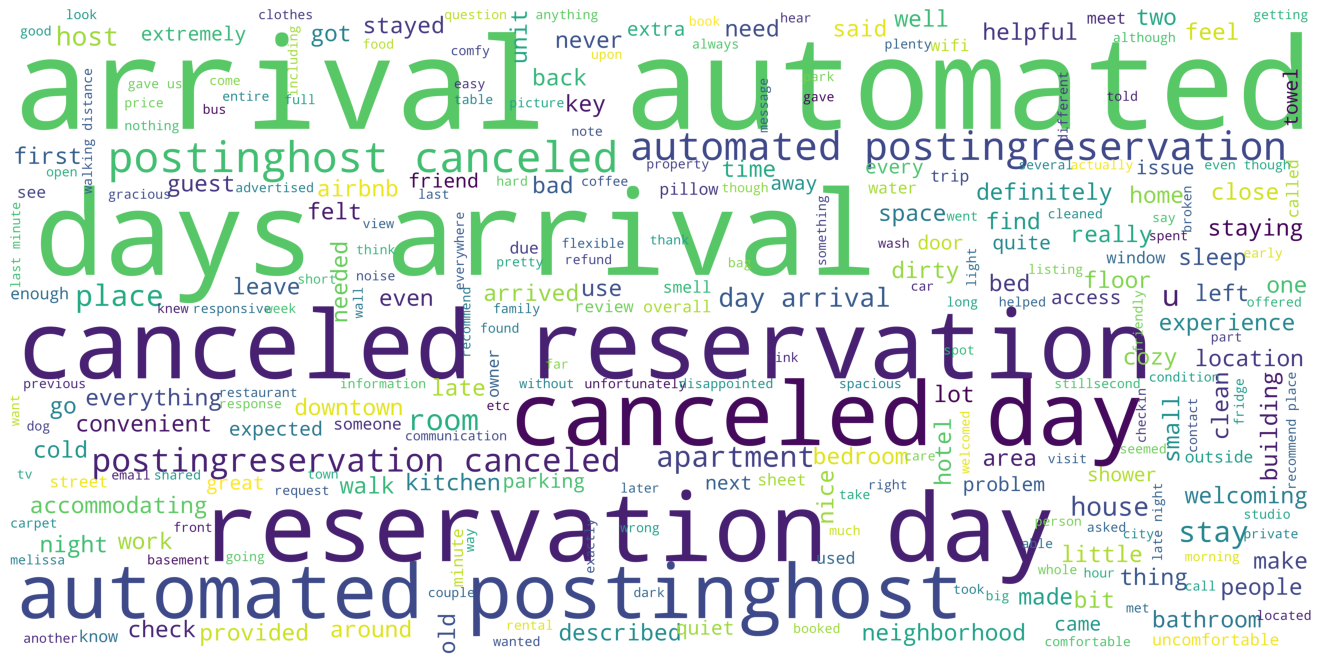

In [68]:
plt.figure(figsize=(24, 12))
wordcloud =  WordCloud(background_color='white', max_words=1000, max_font_size=100, stopwords=STOPWORDS, scale=32, random_state=42)
wordcloud.generate_from_text(comments)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Here, in our comments, we had both positive and negative comments. We had 82157 positive comments and 1559 negative comments. 

For the positive comments, we can see that, the host, the location, comfort of the stay, cleanliness, walking distance for different experiences like restaurants, park, recreational activities matters for the renters and if they really enjoyed the place, they are more likely to recommendate others also. So, for the host to get good reviews and booking, they should communicate clearly, in detail tell the renters the house rules, the nearby places to visit which can be within the walking distance, the place should be comfortable and clean.

Whereas, the negative comments mainly comes to a host, when the reservation is cancled or the posting of the place and the reply from the host is automated. People like to have genuine conservation with each other. They don't like to talk with some robot making them think they are not important and host is too busy to host them. Which in turn makes a bad impression and leaves a negative review. 

<a id='conclusions'></a>
## Conclusions

### Findings:

> From Research Question 1:

1. The superhost status does not increase or decrease the price of a place. 
2. The neighbourhood like Magnolia, Downtown, Queen Anne, Capitol Hill, Cascade are the most expensive place's to stay while places like Lake City, University District, Rainier Valley, Northgate, Delridge are the least expensive place's to stay.
3. Boat is the most expensive property type to stay at.
4. Renting an entire house or apartment cost the most. 

> From Research Question 2:

The price of the rental properties goes on increasing gradually until the month of July which has an average price of 152 dollars and after July, the price start to decrease until December which has a small bump in price. Their might be some coorealtion with the Seasonal flucation and pricing of the rental price. However, we cannot say the season are causing the price change as their might be other factors affecting the price of a place with conjuction to seasonal flucation. 

> From Research Question 3:

In research question 3, we saw how people felt after their stay at the rental place. We got 82157 positive comments and 1559 negative comments. The positive comments were mainly around the host interaction, the loaction of the neighbourhood, comfort of the stay, cleanliness, walking distance to different nearby places. Whereas, the negative comments, mainly revolved around the host cancling the reservation and posting the ad and reply being automated which convey that the host is not welcoming or not free enough to host them.

### Limitations:

As, with all the analysis their is some kind of limitations. We also have some of them.

1. In the analysis of question 1, we have only done univariate analysis. However, bivariate or trivariate analysis can be more effective to find the relationship of price with the variables. Like analysis of host being superhost and review_score with price could have give us more indepth idea about how much actually 5 star superhost is making in comparision with 5 star non-superhost.


2. In the analysis of question 3, we can see, we still have some stopwords in our word cloud which means those words are not included in nltk stopwords dictionary. So, we could have added them manually to make our word cloud more accurate. Also, doing bigram or trigram analysis would have given us more idea what really the renter felt in their stay.
